In [114]:
library(ggplot2)
library(plyr)
options(repr.plot.height=40,repr.plot.width=60) #Ver options

Cargar los datos en un dataframe llamado: airbnb

In [115]:
airbnb <- read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [116]:
airbnb[1:6,]

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [117]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb) <- newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [118]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados*0.092903

In [119]:
airbnb$CodigoPostal

[1] 28004        28004        28004        28004        28015       
    [6] 28004        28004        28004        28015        28004       
   [11] 28004        28004        28013        28005        28013       
   [16] 28013        28013        28012        28013        28013       
   [21] 28013        28005        28013        28012        28012       
   [26] 28013        28014        28013        28012        28005       
   [31] 28005        28005        28005        28012        28005       
   [36] 28005        28045        28005        28005        28005       
   [41] 28005        28005        28013        28013        28013       
   [46] 28013        28013        28012        28013        28012       
   [51] 28013        28013        28013        28012        28013       
   [56] 28013        28012        27013                     28045       
   [61] 28045        28045        28045        28045        28045       
   [66] 28045        28045        28045        28045        28045       
   [71] 28045        28012        28045        28045        28045       
   [76] 28045        28012        28012        28012        28012       
   [81] 28005        28012                     28005        28012       
   [86] 28012        28012        28012        28012        28005       
   [91] 28012        28005        28005        28012        28005       
   [96] 28012        28012        28005        28005        28005       
  [101] 28012        28012        28005        28012        28014       
  [106] 28014        28014        28014        28012        28014       
  [111] 28014        28014        28012        28014        28014       
  [116] 28014        28014        28014        28012        28012       
  [121] 28014        28012        28012        28005        28012       
  [126] 28012        28012        28012        28012        28005       
  [131] 28005                     28012                     28012       
  [136] 28012        28012        28005        28012        28012       
  [141] 28014        28014        28045        28045        28045       
  [146] 28045        28007        28007        28007        28007       
  [151] 28007        28007        28028        28009        28009       
  [156] 28009        28009        28014        28014        28007       
  [161] 28005        28013        28005        28005        28013       
  [166] 28013        28013        28005        28013        28013       
  [171] 28005        28005        28005        28013        28013       
  [176] 28013        28005        28013        28005        28013       
  [181] 28013        28005        28013        28005        28013       
  [186] 28013        28005        28005        28013        28013       
  [191] 28005        28013        28005        28013        28005       
  [196] 28013        28005        28005        28005        28005       
  [201] 28005        28013        28005        28005        28005       
  [206] 28013        28013        28012        28005        28012       
  [211] 28005        28012        28005        28012        28012       
  [216] 28005        28012        28005        28012        28012       
  [221] 28012        28012        28012        28012        28012       
  [226] 28012        28012        28013        28013        28014       
  [231] 28012        28012        28012        28005        28005       
  [236] 28005        28012        28012        28005        28012       
  [241] 28012        28012        28012        28012        28012       
  [246] 28012        28014        28014        28014        28014       
  [251] 28012        28014        28014        28014        28014       
  [256] 28004        28004        28004        28004        28004       
  [261] 28004        28004        28004        28004        28004       
  [266] 28001        28001        28006        28001        28001       
  [271] 28001        28001        28001        28001        28

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [120]:
airbnb$CodigoPostal <- gsub(("^$|-|^28$"), NA, airbnb$CodigoPostal)
airbnb$CodigoPostal <- gsub(("^1|^[3-9]|^2[0-7,9]"), NA, airbnb$CodigoPostal)
airbnb$CodigoPostal <- gsub(("\n....."), "", airbnb$CodigoPostal)
airbnb$CodigoPostal <- gsub(("^2804$"), "28004", airbnb$CodigoPostal)
airbnb$CodigoPostal <- gsub(("^2805$"), "28005", airbnb$CodigoPostal)
airbnb$CodigoPostal <- gsub(("^2815$"), "28015", airbnb$CodigoPostal)
airbnb$CodigoPostal <- gsub(("^.{6}$"), NA, airbnb$CodigoPostal)
airbnb$CodigoPostal <- gsub(("^Madrid "), "", airbnb$CodigoPostal)

In [121]:
airbnb$CodigoPostal

[1] "28004" "28004" "28004" "28004" "28015" "28004" "28004" "28004" "28015"
   [10] "28004" "28004" "28004" "28013" "28005" "28013" "28013" "28013" "28012"
   [19] "28013" "28013" "28013" "28005" "28013" "28012" "28012" "28013" "28014"
   [28] "28013" "28012" "28005" "28005" "28005" "28005" "28012" "28005" "28005"
   [37] "28045" "28005" "28005" "28005" "28005" "28005" "28013" "28013" "28013"
   [46] "28013" "28013" "28012" "28013" "28012" "28013" "28013" "28013" "28012"
   [55] "28013" "28013" "28012" NA      NA      "28045" "28045" "28045" "28045"
   [64] "28045" "28045" "28045" "28045" "28045" "28045" "28045" "28045" "28012"
   [73] "28045" "28045" "28045" "28045" "28012" "28012" "28012" "28012" "28005"
   [82] "28012" NA      "28005" "28012" "28012" "28012" "28012" "28012" "28005"
   [91] "28012" "28005" "28005" "28012" "28005" "28012" "28012" "28005" "28005"
  [100] "28005" "28012" "28012" "28005" "28012" "28014" "28014" "28014" "28014"
  [109] "28012" "28014" "28014" "28014" "28012" "28014" "28014" "28014" "28014"
  [118] "28014" "28012" "28012" "28014" "28012" "28012" "28005" "28012" "28012"
  [127] "28012" "28012" "28012" "28005" "28005" NA      "28012" NA      "28012"
  [136] "28012" "28012" "28005" "28012" "28012" "28014" "28014" "28045" "28045"
  [145] "28045" "28045" "28007" "28007" "28007" "28007" "28007" "28007" "28028"
  [154] "28009" "28009" "28009" "28009" "28014" "28014" "28007" "28005" "28013"
  [163] "28005" "28005" "28013" "28013" "28013" "28005" "28013" "28013" "28005"
  [172] "28005" "28005" "28013" "28013" "28013" "28005" "28013" "28005" "28013"
  [181] "28013" "28005" "28013" "28005" "28013" "28013" "28005" "28005" "28013"
  [190] "28013" "28005" "28013" "28005" "28013" "28005" "28013" "28005" "28005"
  [199] "28005" "28005" "28005" "28013" "28005" "28005" "28005" "28013" "28013"
  [208] "28012" "28005" "28012" "28005" "28012" "28005" "28012" "28012" "28005"
  [217] "28012" "28005" "28012" "28012" "28012" "28012" "28012" "28012" "28012"
  [226] "28012" "28012" "28013" "28013" "28014" "28012" "28012" "28012" "28005"
  [235] "28005" "28005" "28012" "28012" "28005" "28012" "28012" "28012" "28012"
  [244] "28012" "28012" "28012" "28014" "28014" "28014" "28014" "28012" "28014"
  [253] "28014" "28014" "28014" "28004" "28004" "28004" "28004" "28004" "28004"
  [262] "28004" "28004" "28004" "28004" "28001" "28001" "28006" "28001" "28001"
  [271] "28001" "28001" "28001" "28001" "28001" "28006" "28009" NA      "28009"
  [280] "28009" "28009" "28006" "28009" "28006" "28006" NA      "28028" NA     
  [289] "28028" "28028" "28004" "28004" "28004" "28004" "28004" "28004" "28004"
  [298] "28004" "28004" "28004" "28004" "28004" "28004" "28004" "28004" "28004"
  [307] "28004" "28004" "28004" "28004" "28004" "28004" "28015" "28004" "28004"
  [316] "28004" "28015" "28004" "28004" "28015" "28004" "28004" "28004" "28004"
  [325] "28004" "28013" "28015" "28004" "28015" "28004" "28004" "28004" "28015"
  [334] "28004" "28004" "28004" "28015" "28015" "28015" "28015" "28015" "28015"
  [343] "28015" "28010" "28015" "28010" "28010" "28010" "28010" "28010" "28010"
  [352] "28010" "28004" "28010" "28010" "28010" "28028" "28028" "28028" "28028"
  [361] "28006" "28006" "28006" "28006" "28002" "28002" "28006" "28002" "28002"
  [370] "28034" "28050" "28008" "28011" "28011" "28049" "28038" "28053" "28038"
  [379] "28047" "28011" "28011" "28011" "28011" "28011" "28011" "28011" "28047"
  [388] "28011" "28011" "28011" "28011" NA      "28025" "28019" "28019" "28024"
  [397] "28019" "28019" "28019" "28019" "28019" NA      "28025" "28019" "28002"
  [406] "28002" "28002" "28016" "28016" "28036" "28016" "28016" "28016" "28036"
  [415] "28016" "28046" "28039" "28039" "28020" "28020" "28020" "28020" "28020"
  [424] "28020" "28003" "28029" "28029" "28029" "28020" "28015" "28015" "28015"
  [433] "28015" "28015" "28015" "28015" "28015" "28015" "28015" "28010" "28003"
  [442] "28003" "28003" "28003" "28003" "28003" "28029" "28008" "28008" "28008"
  [4

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [122]:
codigosPostalesMadrid <- unique(airbnb$CodigoPostal)
codigosPostalesMadrid

[1] "28004" "28015" "28013" "28005" "28012" "28014" "28045" NA      "28007"
[10] "28028" "28009" "28001" "28006" "28010" "28002" "28034" "28050" "28008"
[19] "28011" "28049" "28038" "28053" "28047" "28025" "28019" "28024" "28016"
[28] "28036" "28046" "28039" "28020" "28003" "28029" "28054" "28041" "28026"
[37] "28058" "28018" "28030" "28017" "28027" "28043" "28033" "28055" "28021"
[46] "28032" "28037" "28022" "28042" "28094" "28035" "28040" "28031" "28044"
[55] "28105" "28023" "28051" "28850" "28048" "28056" "28060" "28052"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [123]:
CodigoPostalFreq <- data.frame(count(airbnb, vars="CodigoPostal"))
CodigoPostalFreq |> arrange(desc(freq)) -> CodigoPostalFreq
CodigoPostalFreq[1:5, ] -> top5CodigoPostal
CodigoPostalFreq |> arrange(freq) -> CodigoPostalFreq
CodigoPostalFreq[1:5, ] -> bottom5CodigoPostal

bottom5CodigoPostal
top5CodigoPostal

,CodigoPostal,freq
,<chr>,<int>
1,28048,1
2,28052,1
3,28056,1
4,28058,1
5,28060,1


,CodigoPostal,freq
,<chr>,<int>
1,28012,2060
2,28004,1796
3,28005,1195
4,28013,1019
5,28014,630


¿Cuales son los barrios que hay en el código postal 28012?

In [124]:
barrios28012 <- na.omit(unique(airbnb$Barrio[airbnb$CodigoPostal=="28012"]))
barrios28012 

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
attr(,"na.action")
[1] 3
attr(,"class")
[1] omit
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [125]:
entradasbarrios28012 <- summary(na.omit(airbnb$Barrio[airbnb$CodigoPostal=="28012"]), length(barrios28012)+1)
entradasbarrios28012

Embajadores             Sol          Cortes Palos de Moguer         Palacio 
           1449             301             216              46              27 
        Acacias     Universidad        Arapiles          Atocha        Delicias 
             13               4               1               1               1 
           Goya         (Other) 
              1               0

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [126]:
todosBarrios <- unique(airbnb$Barrio)
cantidaddeBarrios <- length(todosBarrios)
cantidaddeBarrios
todosBarrios


[1] 125

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [127]:
Top5Barriosinput <- summary(airbnb$Barrio, 6)
Top5Barriosinput

Embajadores Universidad     Palacio         Sol    Justicia     (Other) 
       1844        1358        1083         940         785        7197

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [130]:
cuentadetipodeAlquiler <- length(summary(airbnb$TipoAlquiler))
nombrestipodeAlquiler <- names(summary(airbnb$TipoAlquiler))
informacionTipoAlquiler <- table(airbnb$TipoAlquiler)
print(paste("Hay ", cuentadetipodeAlquiler, "tipos de alquiler"))
print(paste("Los tipos son: ", nombrestipodeAlquiler[1], " ", nombrestipodeAlquiler[2], " ",nombrestipodeAlquiler[3]))
informacionTipoAlquiler 

[1] "Hay  3 tipos de alquiler"
[1] "Los tipos son:  Entire home/apt   Private room   Shared room"



Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

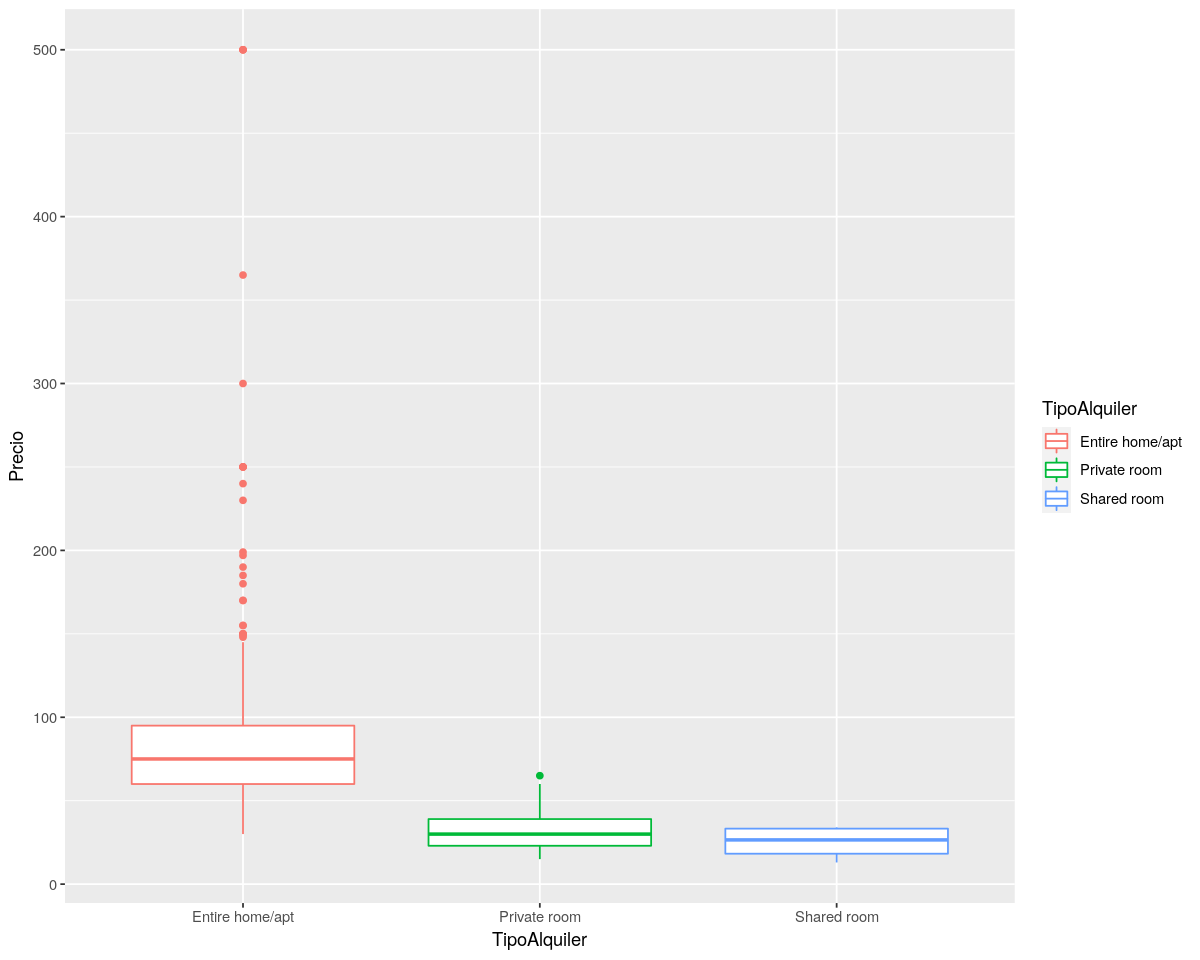

In [131]:
options(repr.plot.height=8,repr.plot.width=10)
ggplot(na.omit(airbnb), aes(y=Precio, x=TipoAlquiler)) + geom_boxplot(aes(color=TipoAlquiler))

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [162]:
print(paste("Tipo de Alquiler: Entire home/apt con un pvalue: ", shapiro.test(sample(airbnb$Precio[airbnb$TipoAlquiler == "Entire home/apt"], 5000))$p.value))
print(paste("Tipo de Alquiler: Private room con un pvalue: ", shapiro.test(sample(airbnb$Precio[airbnb$TipoAlquiler == "Private room"], 5000))$p.value))
print(paste("Tipo de Alquiler: Shared room con un pvalue: ", shapiro.test(airbnb$Precio[airbnb$TipoAlquiler == "Shared room"])$p.value)) 

[1] "Tipo de Alquiler: Entire home/apt con un pvalue:  5.78130446750584e-73"
[1] "Tipo de Alquiler: Private room con un pvalue:  9.14705672330559e-85"
[1] "Tipo de Alquiler: Shared room con un pvalue:  4.51672121600842e-24"


In [140]:
print("Como los p-value de los tres datos son muy bajos los datos no se distribuyen normalmente, por lo tanto el test a utilizar es el de Kruskal para comparar la media de tres grupos")
kruskal.test(Precio ~ TipoAlquiler, airbnb)


[1] "Como los p-value de los tres datos son muy bajos los datos no se distribuyen normalmente, por lo tanto el test a utilizar es el de Kruskal para comparar la media de tres grupos"



	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


In [141]:
print("El pvalue nos permite rechazar la hipotesis nula y asumir la hipotesis alternativa de las medias son significativamente diferentes")


[1] "El pvalue nos permite rechazar la hipotesis nula y asumir la hipotesis alternativa de las medias son significativamente diferentes"


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [142]:
airbnb_entire = airbnb[airbnb$TipoAlquiler=='Entire home/apt',]
head(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [149]:
top5BarriosentireFreq <- data.frame(count(airbnb_entire, vars="Barrio"))
top5BarriosentireFreq  |> arrange(desc(freq)) -> CodigoPostalFreq
CodigoPostalFreq[1:5, ] -> top5BarriosentireFreq
top5BarriosentireFreq


,Barrio,freq
,<fct>,<int>
1,Embajadores,1228
2,Universidad,984
3,Palacio,769
4,Sol,701
5,Cortes,574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [151]:
aggregate(airbnb_entire[c("Precio")], by = list(Barrio = airbnb_entire$Barrio),mean,na.rm=TRUE) |> 
arrange(desc(Precio)) -> Barriosentireprice
Barriosentireprice <- Barriosentireprice[1:5, ]
head(Barriosentireprice)

,Barrio,Precio
,<fct>,<dbl>
1,Palomas,309.7500
2,Fuentelareina,180.0000
3,Recoletos,161.9254
4,El Plantío,150.0000
5,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [152]:
data.frame(count(airbnb_entire, vars="Barrio")) |> merge(Barriosentireprice, by = "Barrio") -> dfBarrioPrecioentrada
head(dfBarrioPrecioentrada)

,Barrio,freq,Precio
,<fct>,<int>,<dbl>
1,Castellana,73,141.3889
2,El Plantío,1,150.0000
3,Fuentelareina,2,180.0000
4,Palomas,4,309.7500
5,Recoletos,135,161.9254


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [154]:
dataBarrioFreq = data.frame(count(airbnb_entire, vars="Barrio")) 
aggregate(airbnb_entire[c("Precio")], by = list(Barrio = airbnb_entire$Barrio),mean,na.rm=TRUE) |>
merge(dataBarrioFreq, by = "Barrio") |> arrange(desc(Precio)) -> top5BarrioFreqmas100
top5BarrioFreqmas100 = top5BarrioFreqmas100[top5BarrioFreqmas100$freq > 100, ]
top5BarrioFreqmas100[1:5,]

,Barrio,Precio,freq
,<fct>,<dbl>,<int>
3,Recoletos,161.92537,135
12,Goya,111.33803,142
19,Sol,100.75036,701
22,Trafalgar,98.57848,223
23,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

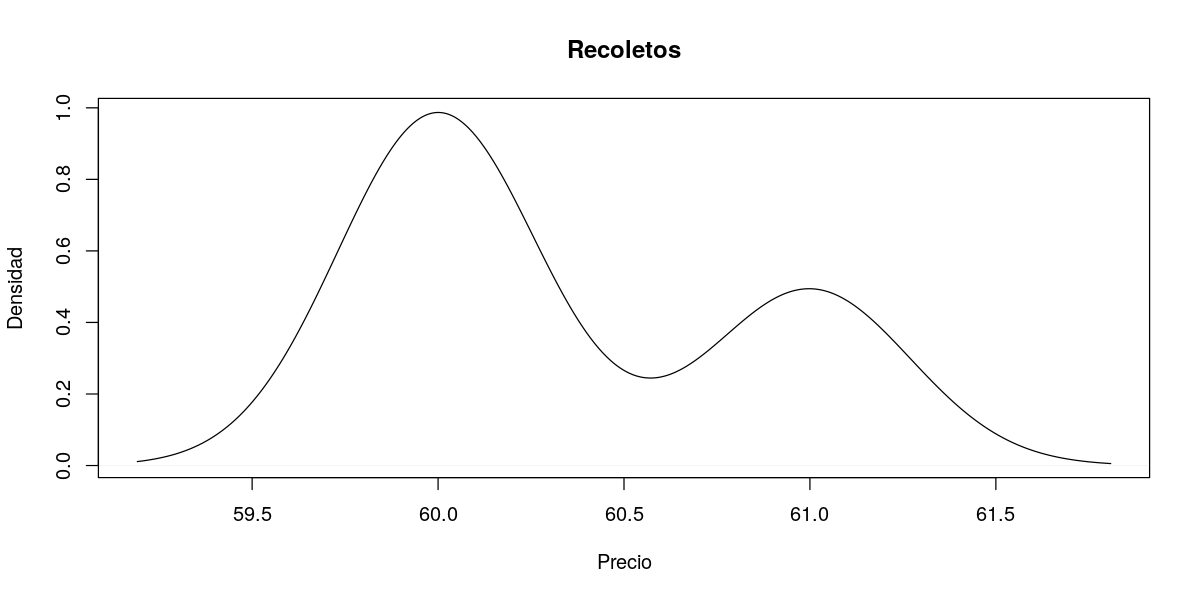

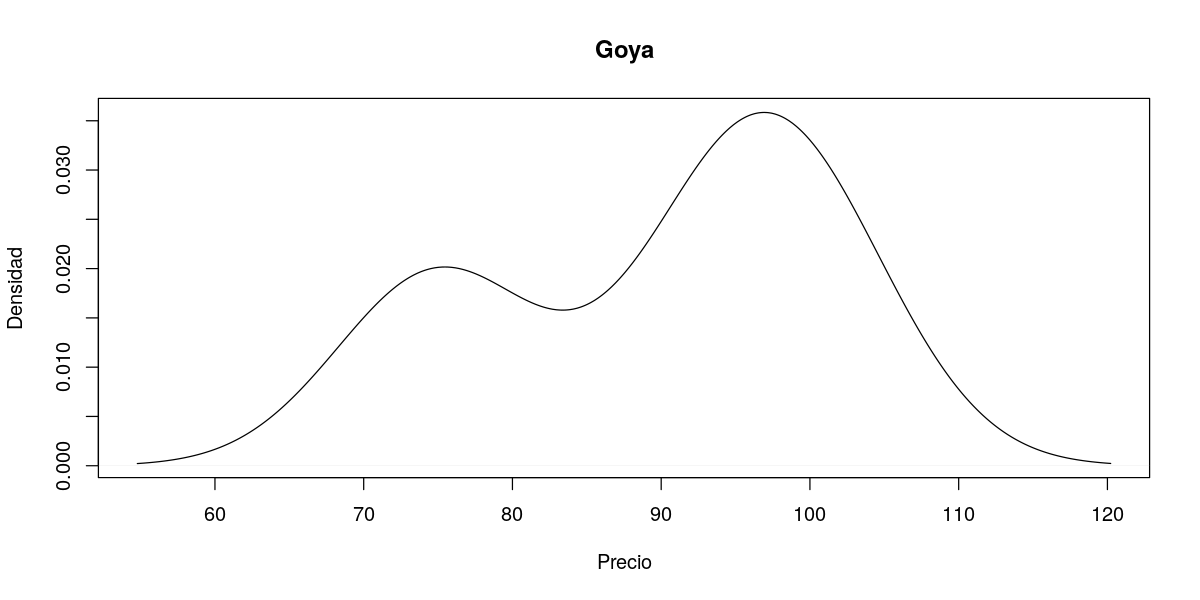

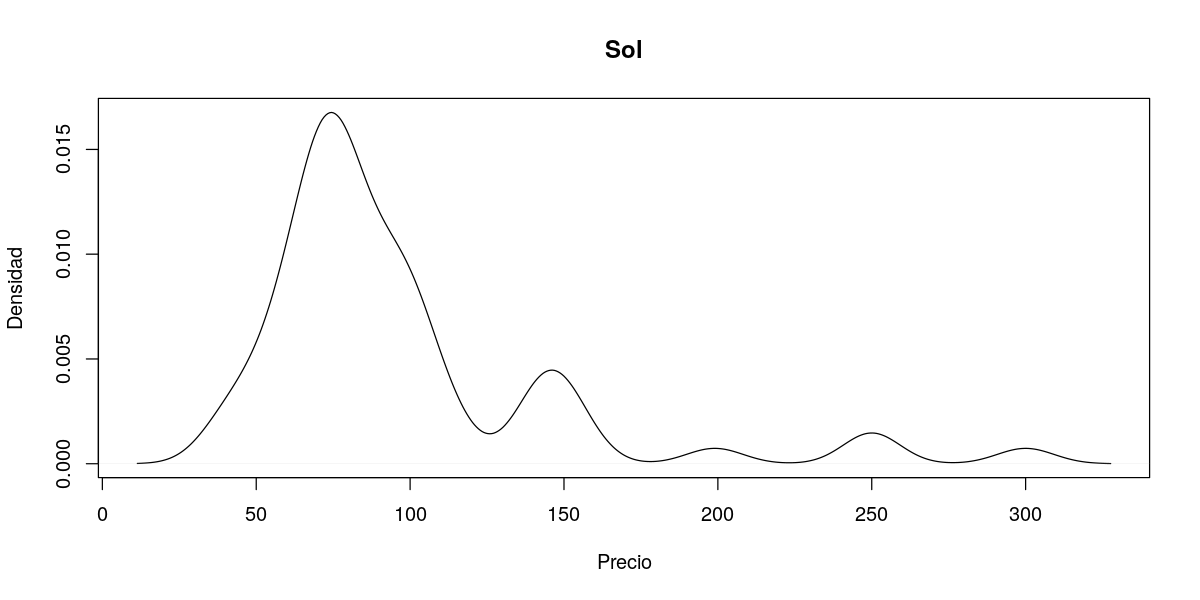

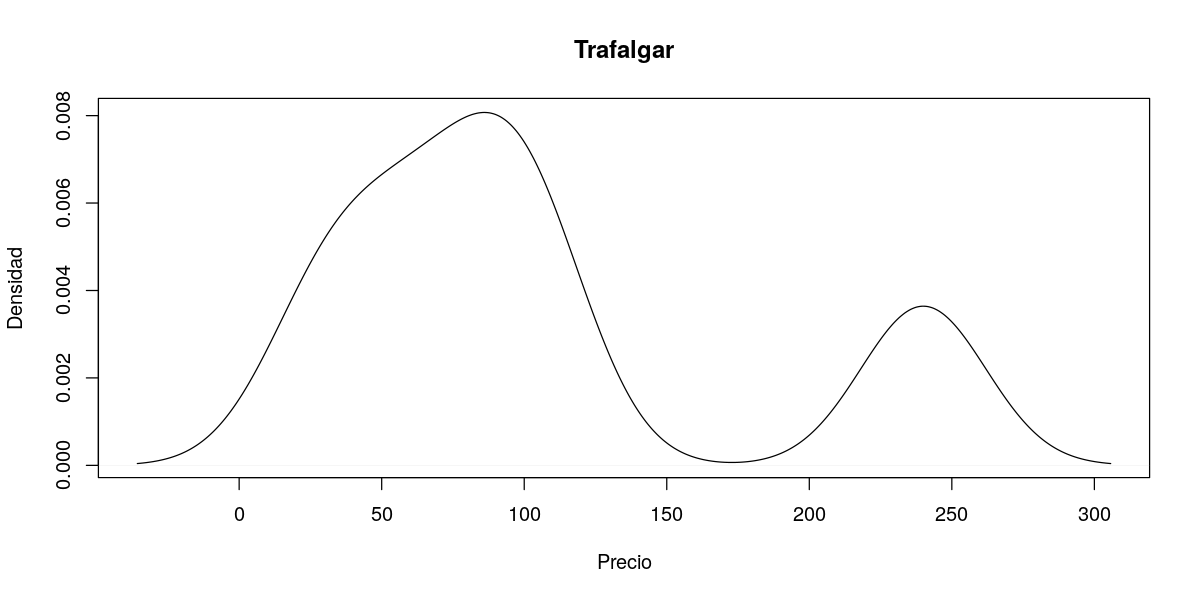

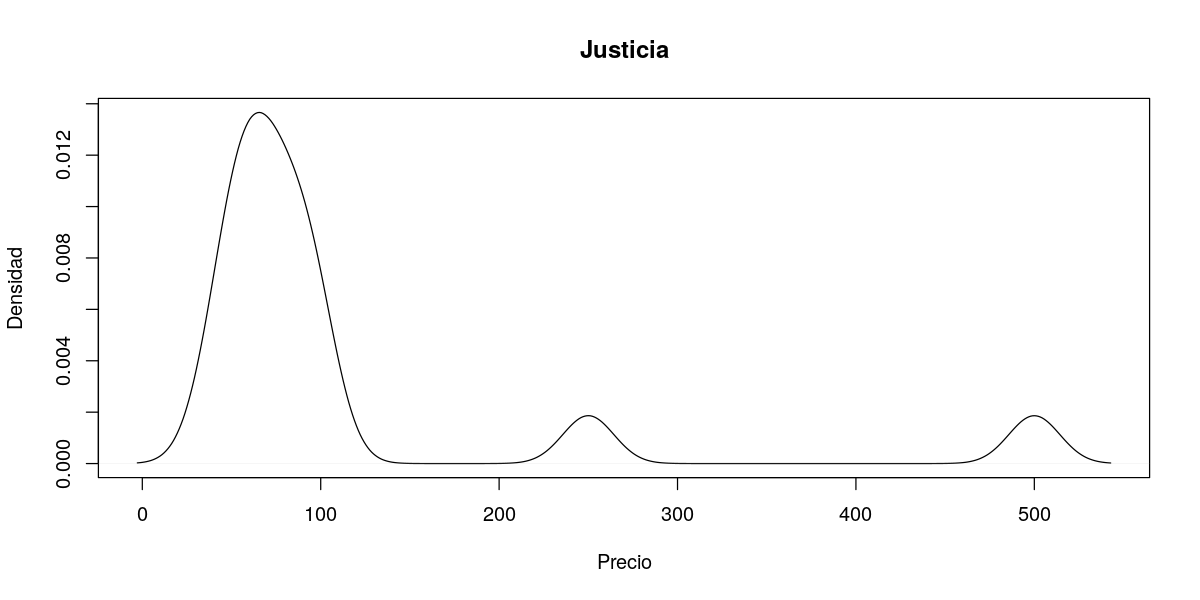

In [155]:
options(repr.plot.height=5,repr.plot.width=10)
vectorBarrios = c(top5BarrioFreqmas100$Barrio[1:5])
for (v in vectorBarrios) {
    airbnb_entire[airbnb_entire$Barrio == v, ] |> arrange(Precio) |> na.omit() -> dfDistribucionprecios
    plot(density(dfDistribucionprecios$Precio), main = v, xlab = "Precio" , ylab = "Densidad")
}

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [156]:
aggregate(airbnb_entire[c("MetrosCuadrados")], by = list(Barrio = airbnb_entire$Barrio),mean,na.rm=TRUE) |>
merge(top5BarrioFreqmas100[1:5,], by = "Barrio") -> top5BarrioMetrosCuadrados
top5BarrioMetrosCuadrados

Barrio,MetrosCuadrados,Precio,freq
<fct>,<dbl>,<dbl>,<int>
Goya,51.68504,111.33803,142
Justicia,28.52669,98.25468,534
Recoletos,26.66316,161.92537,135
Sol,45.61692,100.75036,701
Trafalgar,29.30426,98.57848,223


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

[1] Goya      Justicia  Recoletos Sol       Trafalgar
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

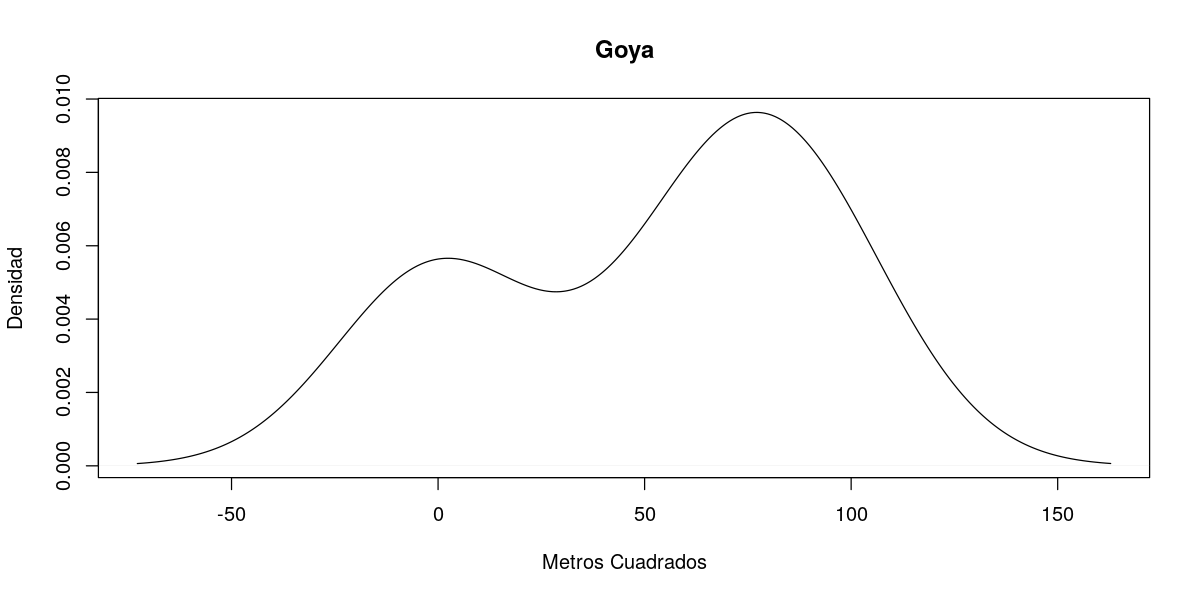

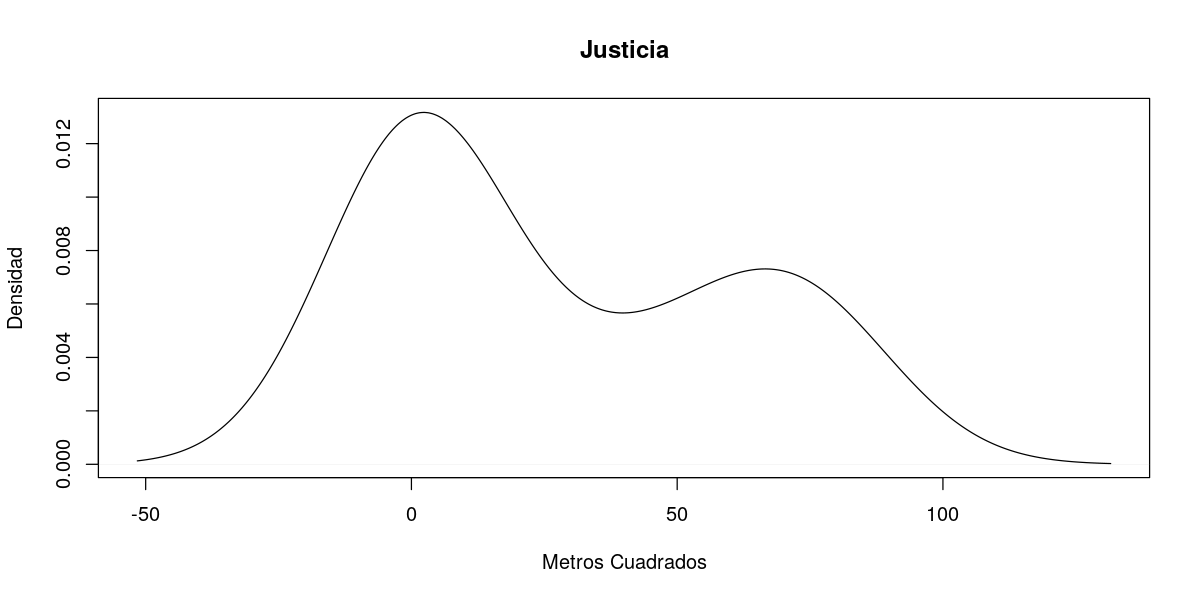

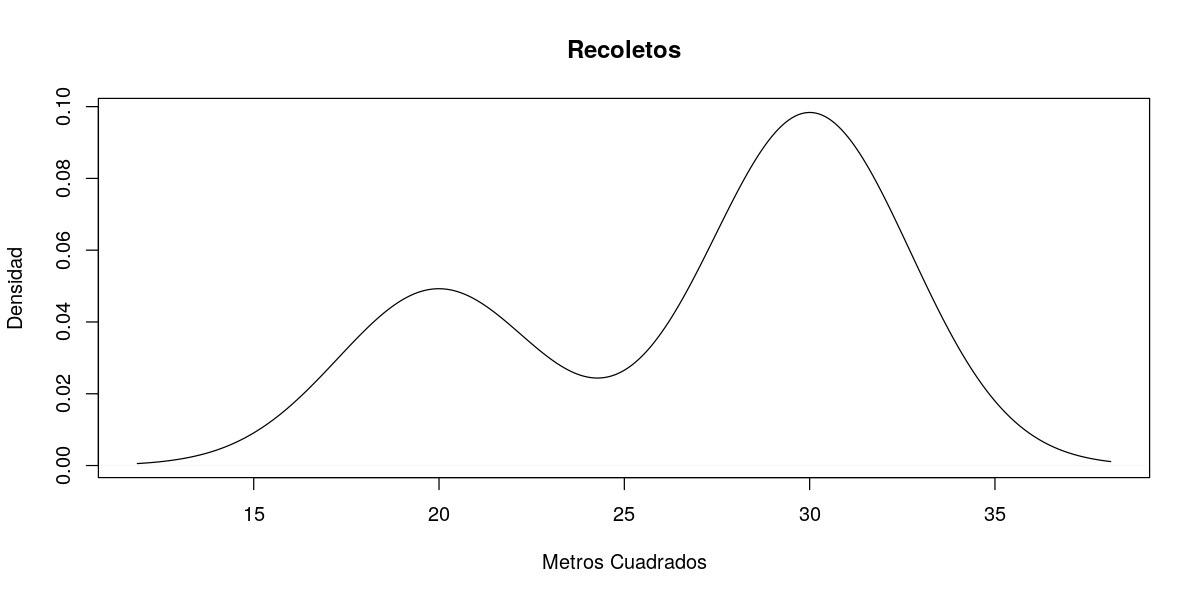

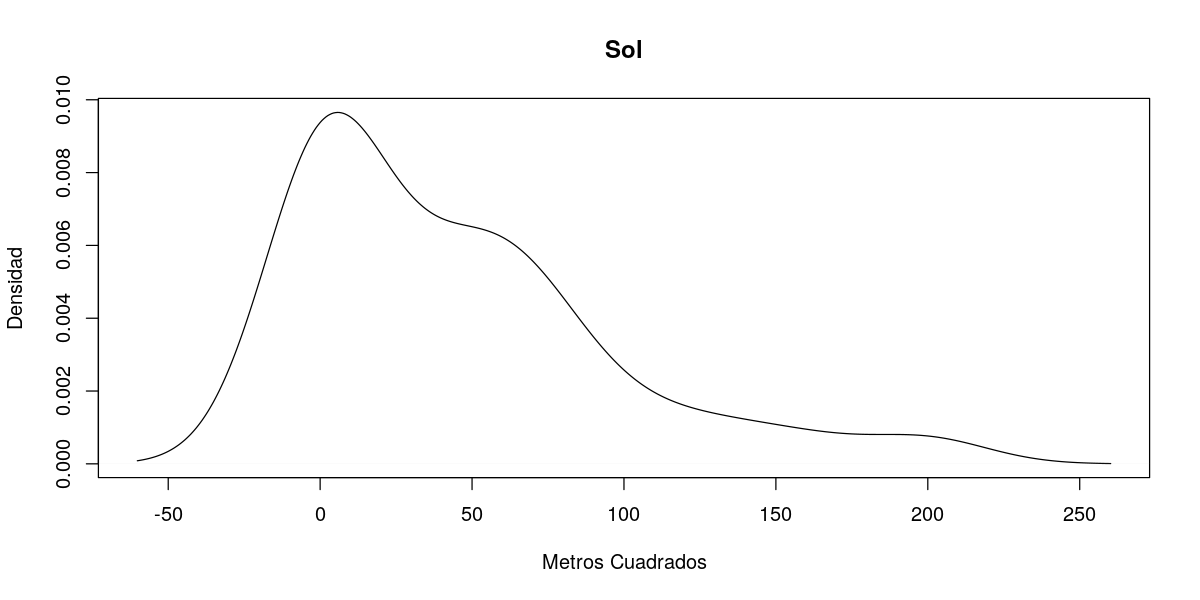

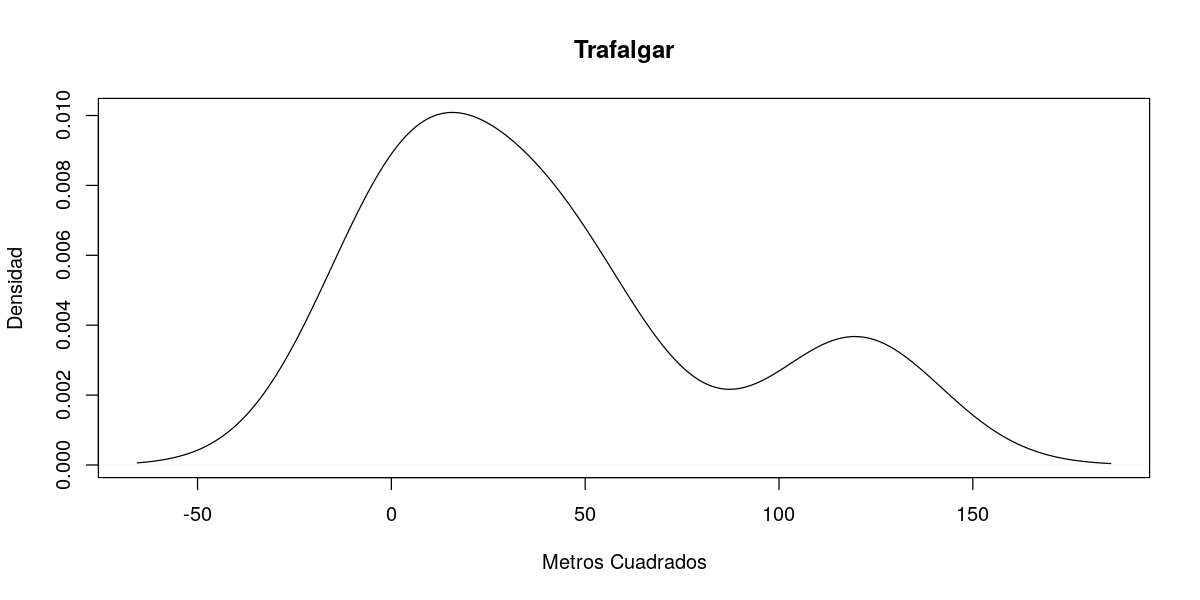

In [164]:
vectorBarrios = c(top5BarrioMetrosCuadrados$Barrio[1:5])
for (v in vectorBarrios) {
    airbnb_entire[airbnb_entire$Barrio == v, ] |> arrange(MetrosCuadrados) |> 
    na.omit() -> dfDistribucioMetrosCuadrados
    plot(density(dfDistribucioMetrosCuadrados$MetrosCuadrados), main = v, xlab = "Metros Cuadrados" , ylab = "Densidad")

}

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [170]:
for (v in vectorBarrios){
    print(paste("El barrio ", v, "con un pvalue: ", shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == v])$p.value))

}

[1] "El barrio  Goya con un pvalue:  0.519924091564745"
[1] "El barrio  Justicia con un pvalue:  0.00064192630271212"
[1] "El barrio  Recoletos con un pvalue:  0"
[1] "El barrio  Sol con un pvalue:  8.6913775134728e-07"
[1] "El barrio  Trafalgar con un pvalue:  0.0127581397426826"


In [201]:
print("Parace que siguen una distribución gaussiana, para comprobarlo utilizaríamos una ANOVA si tienen varianzas iguales o un ANOVA test Welch para varianzas desiguales para saber si tienen una misma varianza aplicamos el test de Bartlett")
top5BarrioMetrosCuadradosDF <- airbnb_entire[airbnb_entire$Barrio == "Goya" | airbnb_entire$Barrio == "Justicia" | airbnb_entire$Barrio == "Recoletos" | airbnb_entire$Barrio == "Sol" | airbnb_entire$Barrio == "Trafalgar",]
bartlett.test(MetrosCuadrados~Barrio, top5BarrioMetrosCuadradosDF)

[1] "Parace que siguen una distribución gaussiana, para comprobarlo utilizaríamos una ANOVA si tienen varianzas iguales o un ANOVA test Welch para varianzas desiguales para saber si tienen una misma varianza aplicamos el test de Bartlett"



	Bartlett test of homogeneity of variances

data:  MetrosCuadrados by Barrio
Bartlett's K-squared = 9.8701, df = 4, p-value = 0.04267


In [203]:
print("El p-value nos lleva a rechazar la hipotesis nula y aceptar la desigualdad de la varianza de los grupos no son iguales compararemos la diferencias de las medias con el anova test welch")
oneway.test(MetrosCuadrados ~ Barrio, top5BarrioMetrosCuadradosDF)


[1] "El p-value nos lleva a rechazar la hipotesis nula y aceptar la desigualdad de la varianza de los grupos no son iguales compararemos la diferencias de las medias con el anova test welch"



	One-way analysis of means (not assuming equal variances)

data:  MetrosCuadrados and Barrio
F = 1.4788, num df = 4.000, denom df = 10.532, p-value = 0.2767


In [204]:
print("Con un pvalue tan alto no se puede rechazar la hipotésis nulas y por lo tanto no podemos asumir que la diferencias de las medias por m2 de los barrios son significativas")

[1] "Con un pvalue tan alto no se puede rechazar la hipotésis nulas y por lo tanto no podemos asumir que la diferencias de las medias por m2 de los barrios son significativas"


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [237]:
barrio_sol <- subset(airbnb_entire,Barrio=="Sol")
barrio_sol1 <- data.frame(barrio_sol["MaxOcupantes"],barrio_sol["NumDormitorios"], barrio_sol["NumBanyos"], barrio_sol["MetrosCuadrados"])

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [238]:
cor(barrio_sol1, use = "pairwise.complete.obs")

,MaxOcupantes,NumDormitorios,NumBanyos,MetrosCuadrados
MaxOcupantes,1.0000000,0.7594598,0.6578162,0.4286233
NumDormitorios,0.7594598,1.0000000,0.6761906,0.5684521
NumBanyos,0.6578162,0.6761906,1.0000000,0.4820549
MetrosCuadrados,0.4286233,0.5684521,0.4820549,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


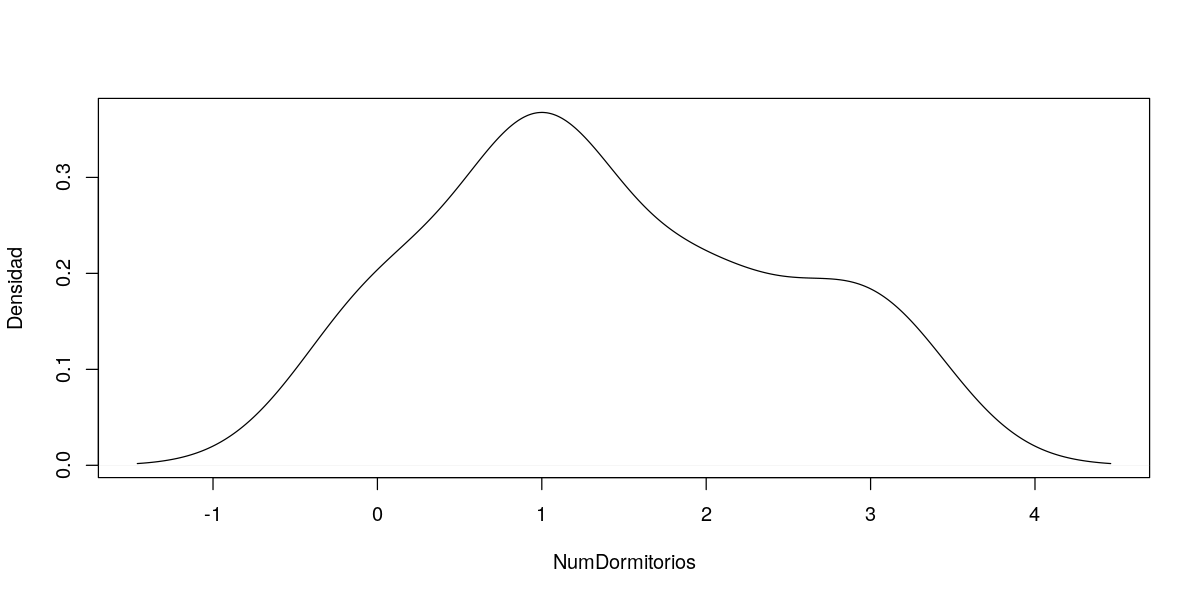

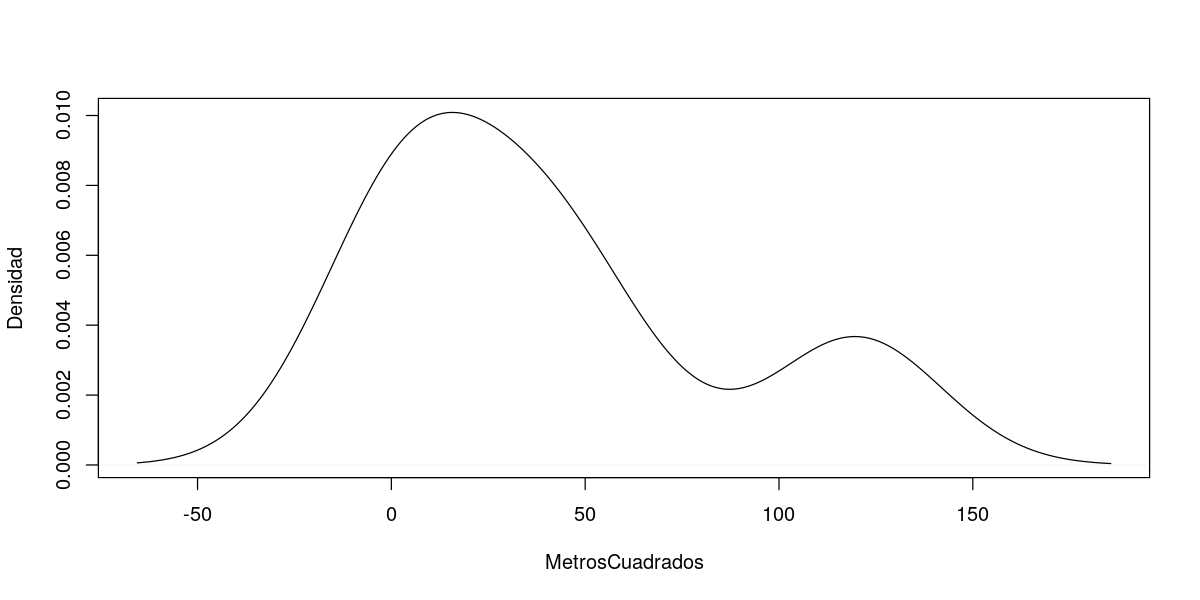

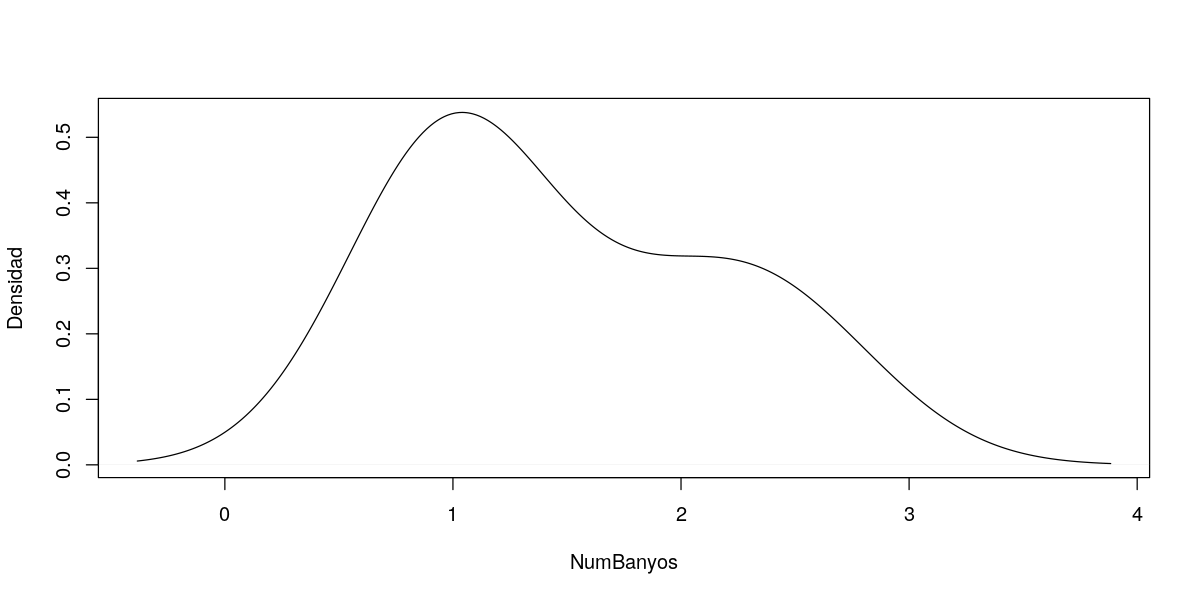

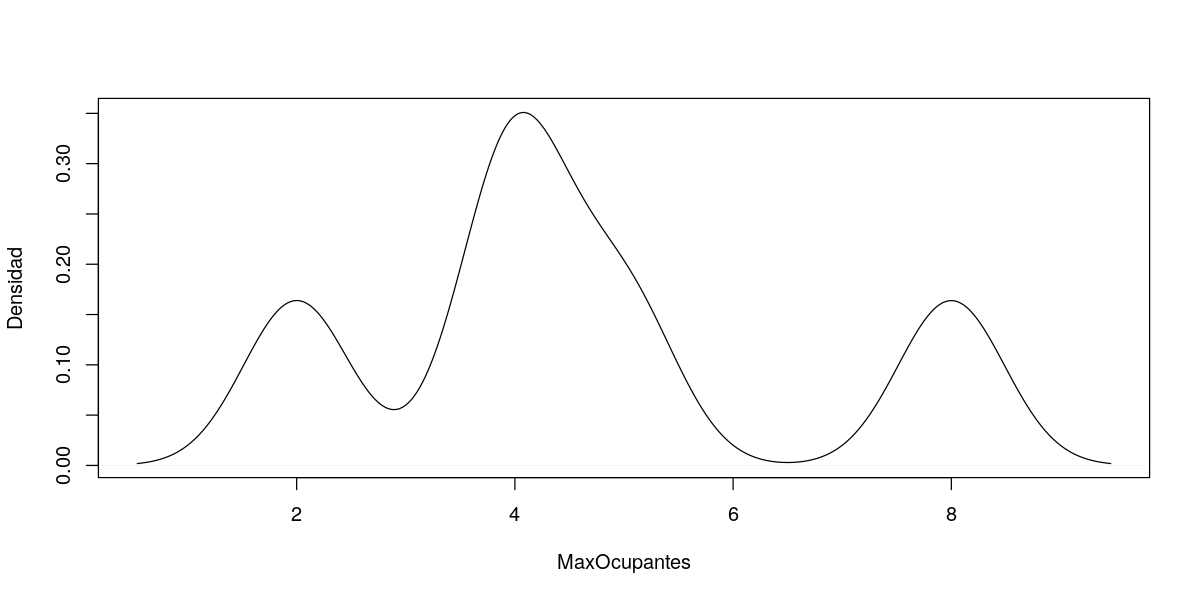

In [239]:
plot(density(dfDistribucioMetrosCuadrados$NumDormitorios), main="", xlab = "NumDormitorios" , ylab = "Densidad")
plot(density(dfDistribucioMetrosCuadrados$MetrosCuadrados), main="", xlab = "MetrosCuadrados" , ylab = "Densidad")
plot(density(dfDistribucioMetrosCuadrados$NumBanyos), main="", xlab = "NumBanyos" , ylab = "Densidad")
plot(density(dfDistribucioMetrosCuadrados$MaxOcupantes), main="", xlab = "MaxOcupantes" , ylab = "Densidad")

In [240]:
print("No son de fiar hay valores = 0 o menores son errores en el dataset puesto que no puede existir pisos de 10m2 y pisos completos sin dormitorios")

[1] "No son de fiar hay valores = 0 o menores son errores en el dataset puesto que no puede existir pisos de 10m2 y pisos completos sin dormitorios"


In [241]:
print("Vamos filtra los datos no fiables con un más de un dormitorio, minimo un baño y con 10 m2 de mínimo")
barrio_sol_filtrado <- barrio_sol1[barrio_sol1$NumDormitorios >= 1 & barrio_sol1$NumBanyos >= 1 & barrio_sol1$MetrosCuadrados >= 10, ]
cor(barrio_sol_filtrado, use = "pairwise.complete.obs")

[1] "Vamos filtra los datos no fiables con un más de un dormitorio, minimo un baño y con 10 m2 de mínimo"


,MaxOcupantes,NumDormitorios,NumBanyos,MetrosCuadrados
MaxOcupantes,1.0000000,0.7827712,0.8579905,0.6957651
NumDormitorios,0.7827712,1.0000000,0.7337699,0.8163771
NumBanyos,0.8579905,0.7337699,1.0000000,0.5928876
MetrosCuadrados,0.6957651,0.8163771,0.5928876,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [243]:
barrio_solyprecio <- data.frame(barrio_sol["MaxOcupantes"],barrio_sol["NumDormitorios"], barrio_sol["MetrosCuadrados"], barrio_sol["NumBanyos"], barrio_sol["Precio"])
barrio_solyprecio <- barrio_solyprecio[barrio_solyprecio$NumDormitorios >= 1 & barrio_solyprecio$NumBanyos >= 1 & barrio_solyprecio$MetrosCuadrados >= 10, ]

In [246]:
modelmultiple <- lm(barrio_solyprecio, formula= Precio~NumDormitorios+MaxOcupantes+NumBanyos+MetrosCuadrados, na.action=na.exclude)
summary(modelmultiple)


Call:
lm(formula = Precio ~ NumDormitorios + MaxOcupantes + NumBanyos + 
    MetrosCuadrados, data = barrio_solyprecio, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.042 -13.252  -2.146  19.666  60.825 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      24.0964    13.8767   1.736  0.09432 . 
NumDormitorios   32.5218    10.1108   3.217  0.00346 **
MaxOcupantes      2.7079     4.7448   0.571  0.57311   
NumBanyos        -2.3020    15.6011  -0.148  0.88383   
MetrosCuadrados   0.1999     0.2200   0.909  0.37189   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.59 on 26 degrees of freedom
  (558 observations deleted due to missingness)
Multiple R-squared:  0.7534,	Adjusted R-squared:  0.7155 
F-statistic: 19.86 on 4 and 26 DF,  p-value: 1.346e-07


In [271]:
modelmultiple2 <- lm(barrio_solyprecio, formula= Precio~NumDormitorios, na.action=na.exclude)
summary(modelmultiple2)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_solyprecio, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.118 -17.180  -0.534  23.143  53.882 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.888     10.500   3.132  0.00394 ** 
NumDormitorios   42.646      4.711   9.052 6.01e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.77 on 29 degrees of freedom
  (558 observations deleted due to missingness)
Multiple R-squared:  0.7386,	Adjusted R-squared:  0.7296 
F-statistic: 81.94 on 1 and 29 DF,  p-value: 6.01e-10


In [256]:
print("El mejor modelo es basado unicamente en el número de dormitorios, que reduce el error cuadrático medio y aumenta el ajuste de R² y es más sencillo al depender de una unica variable")

[1] "El mejor modelo es basado unicamente en el número de dormitorios, que reduce el error cuadrático medio y aumenta el ajuste de R² y es más sencillo al depender de una unica variable"


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [266]:
summary(modelmultiple)
print("Es más fiable el número de habitaciones por su reducido pvalue")


Call:
lm(formula = Precio ~ NumDormitorios + MaxOcupantes + NumBanyos + 
    MetrosCuadrados, data = barrio_solyprecio, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.042 -13.252  -2.146  19.666  60.825 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      24.0964    13.8767   1.736  0.09432 . 
NumDormitorios   32.5218    10.1108   3.217  0.00346 **
MaxOcupantes      2.7079     4.7448   0.571  0.57311   
NumBanyos        -2.3020    15.6011  -0.148  0.88383   
MetrosCuadrados   0.1999     0.2200   0.909  0.37189   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.59 on 26 degrees of freedom
  (558 observations deleted due to missingness)
Multiple R-squared:  0.7534,	Adjusted R-squared:  0.7155 
F-statistic: 19.86 on 4 and 26 DF,  p-value: 1.346e-07


[1] "Es más fiable el número de habitaciones por su reducido pvalue"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [290]:
cnf_int<-confint(modelmultiple)
cnf_int
print(paste("Por cada m2 el aumento medio del precio es ",  modelmultiple$coefficients[5], "con un margen de error del 95% que varía entre un límite inferior de ", cnf_int[5,1], "y un limite superior de",cnf_int[5,2]))

,2.5 %,97.5 %
(Intercept),-4.4274672,52.6203363
NumDormitorios,11.7387666,53.3047345
MaxOcupantes,-7.0452838,12.4609936
NumBanyos,-34.3706431,29.7665731
MetrosCuadrados,-0.2523477,0.6521869


[1] "Por cada m2 el aumento medio del precio es  0.199919627456451 con un margen de error del 95% que varía entre un límite inferior de  -0.252347650504921 y un limite superior de 0.652186905417822"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [291]:
print(paste("Por cada habitación el aumento medio del precio es ",  modelmultiple$coefficients[2], "con un margen de error del 95% que varía entre un límite inferior de ", cnf_int[2,1], "y un limite superior de",cnf_int[2,2]))

[1] "Por cada habitación el aumento medio del precio es  32.5217505805072 con un margen de error del 95% que varía entre un límite inferior de  11.7387666233062 y un limite superior de 53.3047345377081"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [322]:
registros_totales <- length(barrio_sol$NumDormitorios)
registros_contreshabitaciones <- length(barrio_sol$NumDormitorios[barrio_sol$NumDormitorios == 3])
prob = registros_contreshabitaciones/registros_totales

for (X in range[1:10]){
print(paste("La probabilidad de encontrar un apartamento en ", X, "intentos es de ", dbinom(X,registros_totales,prob), "con un intervalo de confianza entre ", binom.test(registros_contreshabitaciones, registros_totales)$conf.int[1], "y ",binom.test(registros_contreshabitaciones, registros_totales)$conf.int[2]))
}

ERROR: Error in range[1:10]: object of type 'builtin' is not subsettable
